# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2019-2020 учебный год

Илья Щуров, Соня Дымченко, Руслан Хайдуров, Александр Каган, Павел Балтабаев

# Семинар 12

На этом семинаре мы:

* Познакомимся с PyTorch
* Вспомним про алгоритм обратного распространения ошибки
* Узнаем о пайплайне разработки нейросетевых моделей на пайторч
* Напишем нашу первую модель

In [1]:
%matplotlib inline

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=600>
<center>(лого здесь, ибо вы должны знать своих героев в лицо)</center>

Существует множество фреймворков для глубокого обучения, но мы рассмотрим фреймворк, который стремительно набирает популярность как среди исследователей в области глубокого обучения, так и среди простых ребят. 

Существует мнение, что регулярное использование PyTorch положительно влияет на здоровье и самочувствие.

In [28]:
%%html
<blockquote class="twitter-tweet" data-lang="en-gb"><p lang="en" dir="ltr">I&#39;ve been using PyTorch a few months now and I&#39;ve never felt better. I have more energy. My skin is clearer. My eye sight has improved.</p>&mdash; Andrej Karpathy (@karpathy) <a href="https://twitter.com/karpathy/status/868178954032513024?ref_src=twsrc%5Etfw">26 May 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [1]:
# install torch if you use linux and pip like this (the same in google colab)
# otherwise see: https://pytorch.org/get-started/locally/
! pip3 install torch torchvision

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 753.4MB 2.0kB/s eta 0:00:01    20% |██████▊                         | 157.9MB 45.6MB/s eta 0:00:14
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 4.0MB 304kB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 772kB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 20.2MB 73kB/s  eta 0:00:01                           | 286kB 32.5MB/s eta 0:00:01



What is PyTorch?
================

<img src >

Это python-based фреймворк, преследующий 2 цели:

- Стать заменой NumPy с возможностью использования мощностей GPU
- Платформа для исследований в области глубокого обучения


Ключевые понятия
---------------

### Тензоры

Тензоры очень похожи на ndarrays в NumPy, но они могут быть загружены в память GPU и все расчеты с ними могут быть произведены на GPU



In [3]:
from __future__ import print_function
import torch

Construct a 5x3 matrix, uninitialized:

In [4]:
x = torch.empty(5, 3)
print(x)

tensor([[1.3563e-19, 1.8888e+31, 8.9066e-15],
        [1.8888e+31, 6.4639e-04, 6.8608e+22],
        [1.7753e+28, 2.0535e-19, 7.5563e+31],
        [1.8014e+25, 8.1335e+32, 7.2436e+22],
        [7.5554e+28, 2.9635e+29, 2.2087e+03]])


In [6]:
x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Construct a randomly initialized matrix:

In [7]:
x = torch.rand(5, 3)
print(x)

tensor([[0.5666, 0.5827, 0.4954],
        [0.5645, 0.9346, 0.2593],
        [0.7839, 0.3906, 0.5195],
        [0.5401, 0.5331, 0.0784],
        [0.3103, 0.6334, 0.9679]])


Construct a matrix filled zeros and of dtype long:


In [8]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:

In [14]:
import numpy as np
x = torch.tensor([5.5, 3])

np.array([1,2,3]), torch.tensor([1,2,3])

x_numpy = torch.from_numpy(np.array([1,2,3]))
x.numpy()

array([5.5, 3. ], dtype=float32)

or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user

In [20]:
x = torch.rand(1)
y = np.array([1.])

x.double() + torch.from_numpy(y)

tensor([1.6139], dtype=torch.float64)

In [21]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float64)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.5735,  0.7419, -0.0877],
        [ 0.8131, -1.0892,  0.0452],
        [ 0.8431,  1.0323, -0.7952],
        [-0.4648,  0.7489, -1.3951],
        [ 1.2960, -0.3276,  0.3877]], dtype=torch.float64)


Get its size:

In [24]:
# They are equivalent
print(x.shape)
print(x.size())

torch.Size([5, 3])
torch.Size([5, 3])


In [26]:
torch.rand(*x.shape) # Equavent to torch.rand_like

tensor([[0.6499, 0.6911, 0.4715],
        [0.4188, 0.5557, 0.5350],
        [0.7295, 0.4736, 0.9507],
        [0.7978, 0.0455, 0.9667],
        [0.2346, 0.6815, 0.9509]])

<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` на самом деле это tuple, так что он поддерживает все операции, характерные для tuple</p></div>

In [27]:
# пример такой операции
len(x.size())

2

In [30]:
values, _ = torch.max(x, axis=1)
values

tensor([0.7419, 0.8131, 1.0323, 0.7489, 1.2960], dtype=torch.float64)

### Операции над тензорами

####  Сложение

In [34]:
y = torch.rand(5, 3, dtype=torch.float64)
print(x + y),print(x - y), print(x * y), print(x @ y.T), torch.exp(x)

tensor([[ 0.7906,  1.4484, -0.0514],
        [ 1.1116, -0.4729,  0.6945],
        [ 1.4963,  1.7338,  0.0527],
        [-0.0806,  1.5334, -0.7849],
        [ 1.7514,  0.2266,  0.5902]], dtype=torch.float64)
tensor([[ 0.3564,  0.0354, -0.1240],
        [ 0.5146, -1.7056, -0.6042],
        [ 0.1900,  0.3307, -1.6432],
        [-0.8490, -0.0356, -2.0053],
        [ 0.8406, -0.8818,  0.1851]], dtype=torch.float64)
tensor([[ 0.1245,  0.5241, -0.0032],
        [ 0.2427, -0.6714,  0.0293],
        [ 0.5507,  0.7242, -0.6743],
        [-0.1786,  0.5875, -0.8513],
        [ 0.5902, -0.1815,  0.0785]], dtype=torch.float64)
tensor([[ 0.6454,  0.5715,  0.8206,  0.7488,  0.6546],
        [-0.5914, -0.3993, -0.1948, -0.5146, -0.2242],
        [ 0.8835,  0.3716,  0.6006,  0.6485,  0.7950],
        [ 0.3776, -0.5830, -0.9612, -0.4423, -0.0792],
        [ 0.0640,  0.4367,  0.9454,  0.4775,  0.4872]], dtype=torch.float64)


(None, None, None, None, tensor([[1.7744, 2.0999, 0.9160],
         [2.2549, 0.3365, 1.0462],
         [2.3236, 2.8075, 0.4515],
         [0.6283, 2.1146, 0.2478],
         [3.6546, 0.7207, 1.4736]], dtype=torch.float64))

In [35]:
# альтернативный синтаксис
print(torch.add(x, y))

tensor([[ 0.7906,  1.4484, -0.0514],
        [ 1.1116, -0.4729,  0.6945],
        [ 1.4963,  1.7338,  0.0527],
        [-0.0806,  1.5334, -0.7849],
        [ 1.7514,  0.2266,  0.5902]], dtype=torch.float64)


providing an output tensor as argument

In [17]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.4462,  1.2460,  1.5569],
        [ 0.5812, -0.5787,  0.5305],
        [-0.7480, -0.5233, -0.9610],
        [ 2.4034, -0.2944,  0.3349],
        [ 1.0604, -0.0738,  1.4064]])


In [18]:
# adds x to y inplace
y.add_(x)
print(y)

tensor([[ 1.4462,  1.2460,  1.5569],
        [ 0.5812, -0.5787,  0.5305],
        [-0.7480, -0.5233, -0.9610],
        [ 2.4034, -0.2944,  0.3349],
        [ 1.0604, -0.0738,  1.4064]])


<div class="alert alert-info"><h4>Note</h4><p>Любая операция, изменяющая тензор in-place имеет в конце нижнее подчеркивание ``_``.
    
Примеры: ``x.copy_(y)``, ``x.t_()``, изменяют ``x``.</p></div>


#### Индексирование, слайсинг

Такое же как в NumPy

In [19]:
print(x[:, 1])

tensor([ 1.0376, -1.2842, -0.6051, -0.8336, -0.3319])


#### Resizing

In [38]:
z = np.random.rand(4, 4)
z.reshape((-1, 8))

array([[0.6297502 , 0.79707384, 0.34579952, 0.23545527, 0.93154713,
        0.05350138, 0.62183578, 0.7246699 ],
       [0.38136154, 0.09958253, 0.85673216, 0.71031411, 0.02656393,
        0.58726684, 0.73518946, 0.20314482]])

In [39]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number

In [40]:
x = torch.randn(1, 1, 1, 1, 1)
print(x)
print(x.item())

tensor([[[[[0.1995]]]]])
0.19946841895580292


In [52]:
torch.set_default_dtype(torch.float32)

In [53]:
torch.get_default_dtype()

torch.float32

In [54]:
torch.rand(1, 2, 3).dtype

torch.float32

In [46]:
type(x[0, 0, 0, 0, 0])

torch.Tensor

Более подробно обо всех операция можно почитать тут: [доки пайторчей](http://pytorch.org/docs/torch)

### Связь с NumPy

Можно конвертировать тензоры в NumPy array и обратно без особого труда (в Tensorflow для этого нужен "особый труд", начиная с версии tensorflow 2.0 это не так). 


*Note: the Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.*


In [59]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [61]:
b = a.numpy()
# print(b)
np.array(a)

array([1., 1., 1., 1., 1.], dtype=float32)

Если поменяем a, то поменяется и b, т.к. объекты делят общую память

In [24]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Создаем тензор из NumPy массива, изменяем объект NumPy массива и видим, что тензор пайторча тоже поменялся.  

In [25]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Небольшая практическая часть

Нарисуйте функцию с помощью тензоров из пайторча

**Butterfly curve**

$$x = \sin(t) \left(e^{\cos(t)} - 2\cos(4t) - \sin^5\left({t \over 12}\right)\right)$$
$${\displaystyle y=\cos(t)\left(e^{\cos(t)}-2\cos(4t)-\sin ^{5}\left({t \over 12}\right)\right)} $$
$${\displaystyle 0\leq t\leq 12\pi } $$


In [69]:
torch.asin(x).pow(5)

tensor([[[[[0.0003]]]]])

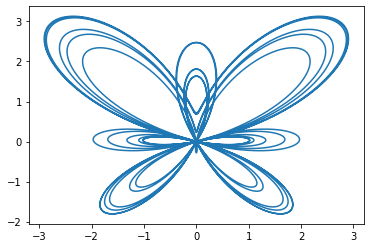

In [72]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

t = torch.linspace(0, 12*math.pi, steps = 10000)

# compute x(t) and y(t) as defined above
x = # YOUR CODE
y = # YOUR CODE

plt.plot(x.numpy(), y.numpy())

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.

(Да-да, нужно прописывать explicitly для для каждого тензора на каком же девайсе ему быть)

> - А что такое **CUDA**?
> - Это бекенд pyTorch, библиотека на C/C++, реализующая оптимальные вычисления на видеокартах фирмы Nvidia. 


In [73]:
torch.cuda.is_available()

True

In [76]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [77]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

RuntimeError: CUDA error: out of memory

#  Нейронные сети

In [84]:
f = torch.sigmoid # 1 / (1 + exp(-x))
f = torch.relu # max(x, 0)

x = torch.randn(32, 10)
W = torch.randn(10, 100)
b = torch.randn(100)

y = f(x @ W + b)

y

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  3.9537, 11.3566],
        [ 0.0000,  5.8204,  4.7392,  ...,  0.0000,  5.6463,  4.7326],
        ...,
        [ 4.4755,  6.5596,  1.8164,  ...,  5.9297,  8.6207,  0.0000],
        [ 0.0000,  5.3403,  3.3269,  ...,  0.0000,  3.5010,  6.5812],
        [ 0.0000,  0.9511,  0.0000,  ...,  0.0000,  9.7979,  6.2148]])


### Типичный пайплайн разработки нейросетевой модели


- Задаем архитектуру сети
- Итерируемся по датасету входных данных
- Каждый кусок датасета (батч) прогоняем через архитектуру **[forward pass]**
- Считаем значение функции потерь (насколько предсказание сети отличается от правильного ответа) **[forward pass]**
- Считаем градиенты функции потерь по параметрам сети с помощью алгоритма обратного распространения ошибки (backpropagation) **[backward pass]**
- Обновляем веса сети по простому правилу (или его вариациаями):
  ``weight = weight - learning_rate * gradient``
  
#### Backpropagation

Чтобы лучше понять backprop можно почитать [тут](http://cs231n.github.io/optimization-2/)



* На картинке зеленым цветом представлены значения в узлах вычислительного графа при прямом проходе
* Красным цветом обозначены подсчитанные на обратном проходе градиенты

<img src="https://i.stack.imgur.com/zP6uK.png" width=500>

В виде кода это выглядит следующим образом:

In [30]:
# set some inputs
x = -2; y = 5; z = -4

# perform the forward pass
q = x + y # q becomes 3
f = q * z # f becomes -12

# perform the backward pass (backpropagation) in reverse order:
# first backprop through f = q * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
# now backprop through q = x + y
dfdx = 1.0 * dfdq # dq/dx = 1. And the multiplication here is the chain rule!
dfdy = 1.0 * dfdq # dq/dy = 1

* Никто бы не пользовался фреймворками для обучения нейронных сетей, если бы в них не было возможности автоматического дифференцирования!

* `torch.autograd` позволяет делать **backward pass** без участия разработчика!

* В тензорах pyTorch на самом деле хранятся градиенты по этим тензорам

* Специально для работы с нейросетями у торча припасен модуль `torch.nn`.


In [101]:
from torch.nn import functional as F

f = F.sigmoid # 1 / (1 + exp(-x))

z = torch.randn(32, 10, requires_grad=True)
x = z + 1
W = torch.randn(10, 100, requires_grad=True)

y = f(x @ W)

L = torch.sum(y ** 2)
# want: dL / dW
L.backward() # L -- зависит от y
# y зависит от x, W
# x зависит от z
# backward вызовет подсчёт производной dL / dy
# а затем рекурсивно ту же операцию для всех тензоров, от которых зависит y
# то есть для x и W
# следом для x.
# и так далее 

In [105]:
W.grad.shape

torch.Size([10, 100])

In [106]:
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

##### Подготовка данных

Используются пайплайны подготовки данных из PyTorch (не обязательно в это вникать на текущем этапе)

In [110]:
# MNIST Dataset (Images and Labels)
batch_size = 32
train_dataset = dsets.MNIST(root='.', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

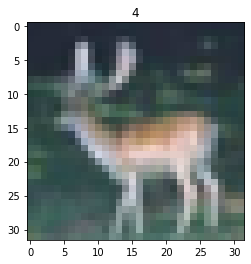

In [143]:
import matplotlib.pyplot as plt

i = np.random.randint(0, 200)
plt.title(cifar_10[i][1])
plt.imshow(cifar_10[i][0].numpy().transpose(1,2,0))
plt.show()

In [128]:
cifar_10 = dsets.CIFAR10(root="./cifar10", download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [144]:
test_dataset = dsets.MNIST(root='.', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [145]:
for image, label in train_loader:
    print(image.shape, label.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [146]:
print("* Размер train\n [количество_примеров, высота_картинки, ширина_картинки]: ", train_dataset.train_data.shape)
print("* Размер test\n [количество_примеров, высота_картинки, ширина_картинки]: ", test_dataset.test_data.shape)
print("---")
print("Метки классов в датасете: ", train_dataset.train_labels.unique())

* Размер train
 [количество_примеров, высота_картинки, ширина_картинки]:  torch.Size([60000, 28, 28])
* Размер test
 [количество_примеров, высота_картинки, ширина_картинки]:  torch.Size([10000, 28, 28])
---
Метки классов в датасете:  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


/mnt/hdd1/users/sorain/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/mnt/hdd1/users/sorain/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/mnt/hdd1/users/sorain/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


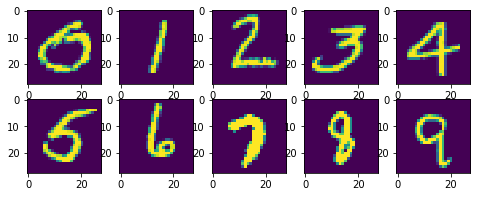

In [147]:
fig=plt.figure(figsize=(8, 3))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    idx = np.random.choice(np.arange(60000)[train_dataset.train_labels.numpy()==i-1])
    img = train_dataset.train_data[idx]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

##### Разработка модели на примере логистической регрессии

**Правила торча для nn**

* Необходимо всегда писать класс для каждой модели
* Этот класс всегда необходимо наследовать от модуля nn.Module
    - в этом случае backward pass прописан за вас и нужно написать только forward
* В `__init__` создаем слои и функции, которыми будем пользоваться в forward & backward стадиях
* В `forward` прописываем непосредственную архитектуру сети (как слои связаны друг с другом)


**Полносвязный слой**

Сегодня мы используем только полносвязный или линейный слой `nn.Linear`.

Линейный слой имеет 2 параметра `in_features`, `out_features`, что напрямую соответствует размерностям матрицы `W` в формуле:
$$\Large \underset{[batch\_size \times out\_features]}{x\_out} = \underset{[batch\_size \times in\_features]}{x\_in} \cdot \underset{[in\_features \times out\_features]}{W}$$

In [ ]:
nn.MaxPool2d()
nn.Conv2d
nn.ReLU


In [148]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        # всегда вызываем super метод в таком формате,
        # если init метод хотим прописать в классе
        super(LogisticRegression, self).__init__()
        
        # в методе __init__ мы создаем объекты (слои и операции),
        # которыми желаем пользоваться в forward & backward стадиях
        # здесь мы создаем и сохраняем ссылку на объект линейного слоя
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        # здесь мы применяем линейный слой к входным данным и возращаем результат
        logits = self.linear(x)
        return logits

In [149]:
# Задаем гиперпараметры
input_size = 784 # 28*28 -- мы вытянули в линию все пиксели картинки
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [150]:
# Создаем объект модели с этими параметрами
model = LogisticRegression(input_size=input_size, num_classes=num_classes)

In [151]:
# проверим на рандомных данных forward pass
rnd_x = np.random.rand(1, input_size)
out = model.forward(torch.from_numpy(rnd_x).float())
print(out.size())
print(out)

torch.Size([1, 10])
tensor([[-0.0454,  0.3486, -0.2955, -0.4019,  0.1143,  0.0010, -0.4662, -0.3099,
         -0.4631,  0.0435]], grad_fn=<AddmmBackward>)


Можно посмотреть на размер матрицы W для линейного слоя модели.

Здесь видно 10 - количество классов.
Выходит, что для каждого класса хранятся свои 784 параметра!

In [152]:
model.linear.parameters().__next__().size()

torch.Size([10, 784])

### Функция потерь и обучение

In [142]:
# Какие параметры обучаем?

In [143]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0291, -0.0086,  0.0256,  ...,  0.0325,  0.0059, -0.0201],
        [ 0.0158,  0.0195, -0.0197,  ..., -0.0082, -0.0125,  0.0002],
        [ 0.0139, -0.0063, -0.0070,  ...,  0.0188,  0.0136, -0.0348],
        ...,
        [ 0.0208, -0.0354, -0.0193,  ...,  0.0160, -0.0151,  0.0076],
        [ 0.0009,  0.0243, -0.0193,  ...,  0.0109,  0.0083, -0.0028],
        [ 0.0321, -0.0199,  0.0071,  ...,  0.0125, -0.0344,  0.0080]],
       requires_grad=True)
Parameter containing:
tensor([-0.0028, -0.0210,  0.0139,  0.0211, -0.0253,  0.0092, -0.0189,  0.0006,
        -0.0070, -0.0208], requires_grad=True)


Получили как раз параметры $W$ & $b$, которые и обучаются в лог регрессии

Объявляем функцию потерь -- **софтмакс от входных данных этой функции считается у нее внутри**, поэтому в нашей модели не было слоя с софтмаксом, хотя он и должен был бы быть.

In [154]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [156]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # разворачиваем картинку в строчку пикселей
        images = images.view(-1, 28*28)
        
        # можно сделать model(input) или model.forward(input) -- это одно и то же
        # таким образом делаем прямой проход
        outputs = model(images)
        
        # считаем функцию потерь
        loss = criterion(outputs, labels)
        
        # зануляем градиенты оптимайзера,
        # т.к каждый шаг он добавляет значение градиентов
        # к текущему состоянию градиентов каждой переменной
        optimizer.zero_grad()
        
        # пробрасываем градиенты для всех переменных
        # в вычислительном графе
        loss.backward()
        
        # обновляем значения параметров модели
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))

Epoch: [1/5], Step: [100/600], Loss: 2.0898
Epoch: [1/5], Step: [200/600], Loss: 2.0224
Epoch: [1/5], Step: [300/600], Loss: 1.9837
Epoch: [1/5], Step: [400/600], Loss: 1.8966
Epoch: [1/5], Step: [500/600], Loss: 1.7062
Epoch: [1/5], Step: [600/600], Loss: 1.6990
Epoch: [1/5], Step: [700/600], Loss: 1.6819
Epoch: [1/5], Step: [800/600], Loss: 1.6319
Epoch: [1/5], Step: [900/600], Loss: 1.4925
Epoch: [1/5], Step: [1000/600], Loss: 1.5182
Epoch: [1/5], Step: [1100/600], Loss: 1.4603
Epoch: [1/5], Step: [1200/600], Loss: 1.4124
Epoch: [1/5], Step: [1300/600], Loss: 1.1787
Epoch: [1/5], Step: [1400/600], Loss: 1.3550
Epoch: [1/5], Step: [1500/600], Loss: 1.3434
Epoch: [1/5], Step: [1600/600], Loss: 1.3827
Epoch: [1/5], Step: [1700/600], Loss: 1.3432
Epoch: [1/5], Step: [1800/600], Loss: 1.0809
Epoch: [2/5], Step: [100/600], Loss: 1.2201
Epoch: [2/5], Step: [200/600], Loss: 1.2768
Epoch: [2/5], Step: [300/600], Loss: 1.0343
Epoch: [2/5], Step: [400/600], Loss: 1.2004
Epoch: [2/5], Step: [50

## Визуализация весов

Теперь давайте провизуализируем веса модели, чтобы понять какие "фичи" модель выделила для каждого класса

In [157]:
W = model.parameters().__next__().detach().numpy()
W.shape

(10, 784)

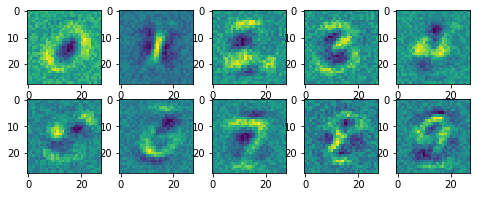

In [158]:
fig=plt.figure(figsize=(8, 3))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = W[i-1].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Как вы думаете, почему так вышло, что веса модели оказались так похожи на сами картинки?

## Задания

1. Посчитайте метрику (roc_auc) для предсказаний модели на отложенной выборке (test_dataset)

2. Напишите модель Логистической регрессии без использования слоев из PyTorch, а используя только перемножения тензоров.

3. Добавьте линейных слоев в модель. Изменится ли качество классификации?

4. Как вы думаете, имеет ли смысл добавлять друг за другом несколько линейных слоев?

5. Что можно сделать, чтобы добавление нескольких линейных слоев в модель имело бы смысл?